In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')
# sns.set_style('darkgrid')

# **Reading CSV**

In [2]:
sample = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

# **Exploring Train Dataset**
* This is the data that will help train our model so we have to make sure what features(inputs variables) are worth using for traning the mode.

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# File and Data Field Descriptions
* **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the **target**, the column you are trying to predict.
* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* **sample_submission.csv** - A submission file in the correct format.
* **PassengerId** - Id for each passenger in the test set.
* **Transported** - The target. For each passenger, predict either True or False.

## First we will see how many variables are **numerical** and **categorical** in our training data.
* For numerical data we will perform few steps of EDA to make sure that our data is perfect to be trained.
* For categorical data we will make dummy variables to make model more accurate.

In [4]:
col = train.select_dtypes(include=np.number) # the dataframe of columns related to numbered data
col.columns # returns all the columns name

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [5]:
col = train.select_dtypes(include=np.object) # the dataframe of columns related to categorical data
col.columns # returns all the columns name

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

## Data Cleaning
* There are different approaches to deal with missing values.
* One of the many approaches is to drop the null values which is not the best approach because you loose a healty pecentage of your data.
* For starters we just try to drop null values and cover the loses with a bit of feature engineering.

#### Checking the information of dataset i.e. total no of rows and total no of columns and the type of data rows are having

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Checking some statistics measure.

In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Checking how many values are null in each column and then adding all the null values of each column.

In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Checking the null values using Matrix graph of Missingno Library.
* White spaces are representing the null values.
* Gray area is representing the not null values(available values).
* The bar on the right side is representing (on the left side of the bar, 11) how many values are not present in each row and how many values are present (on the right side of the bar , 14).

<AxesSubplot:>

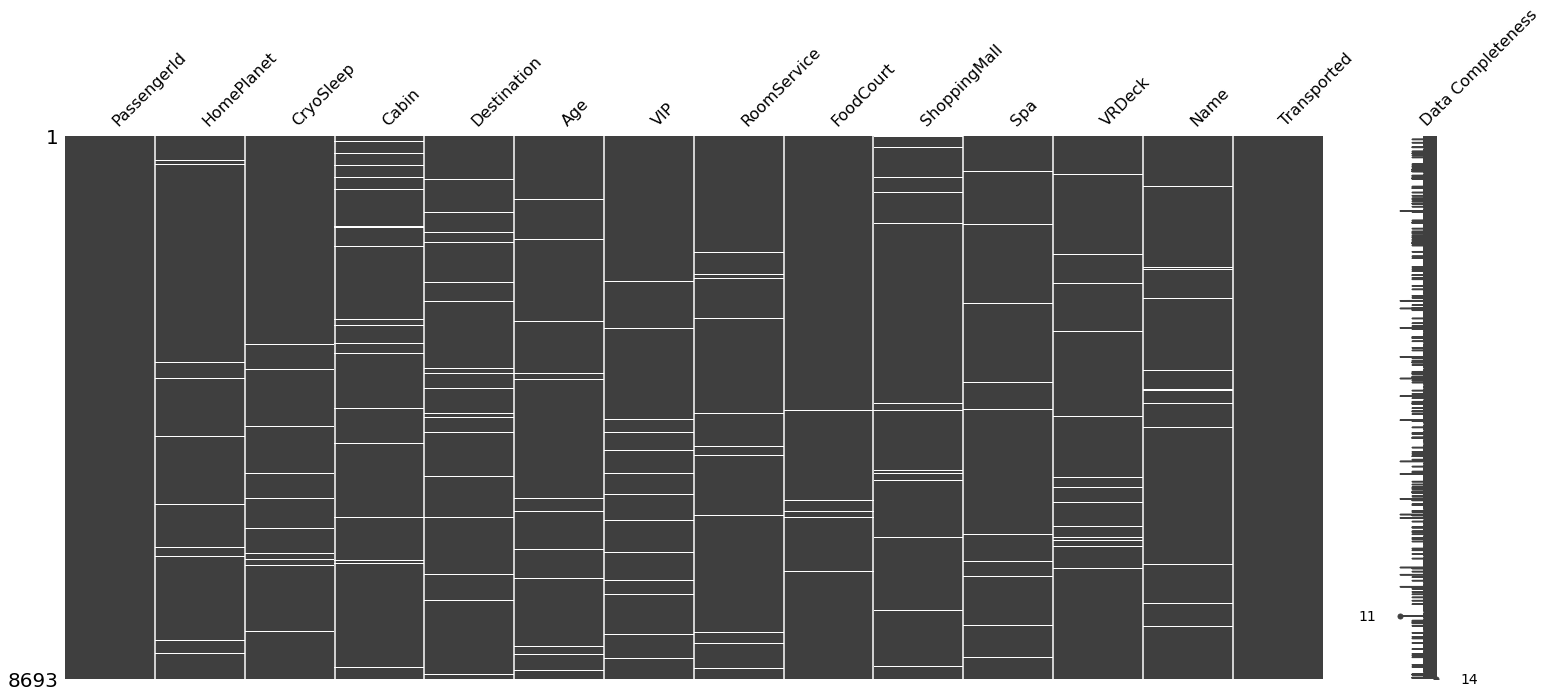

In [9]:
msno.matrix(train,labels = True)

#### Calculating the data loss(in %age).

In [10]:
(1 - train.dropna().shape[0]/train.shape[0]) * 100

24.00782238582768

#### Dropping the null values.

In [11]:
train = train.dropna()

#### Rechecking the Matrix for null values.

<AxesSubplot:>

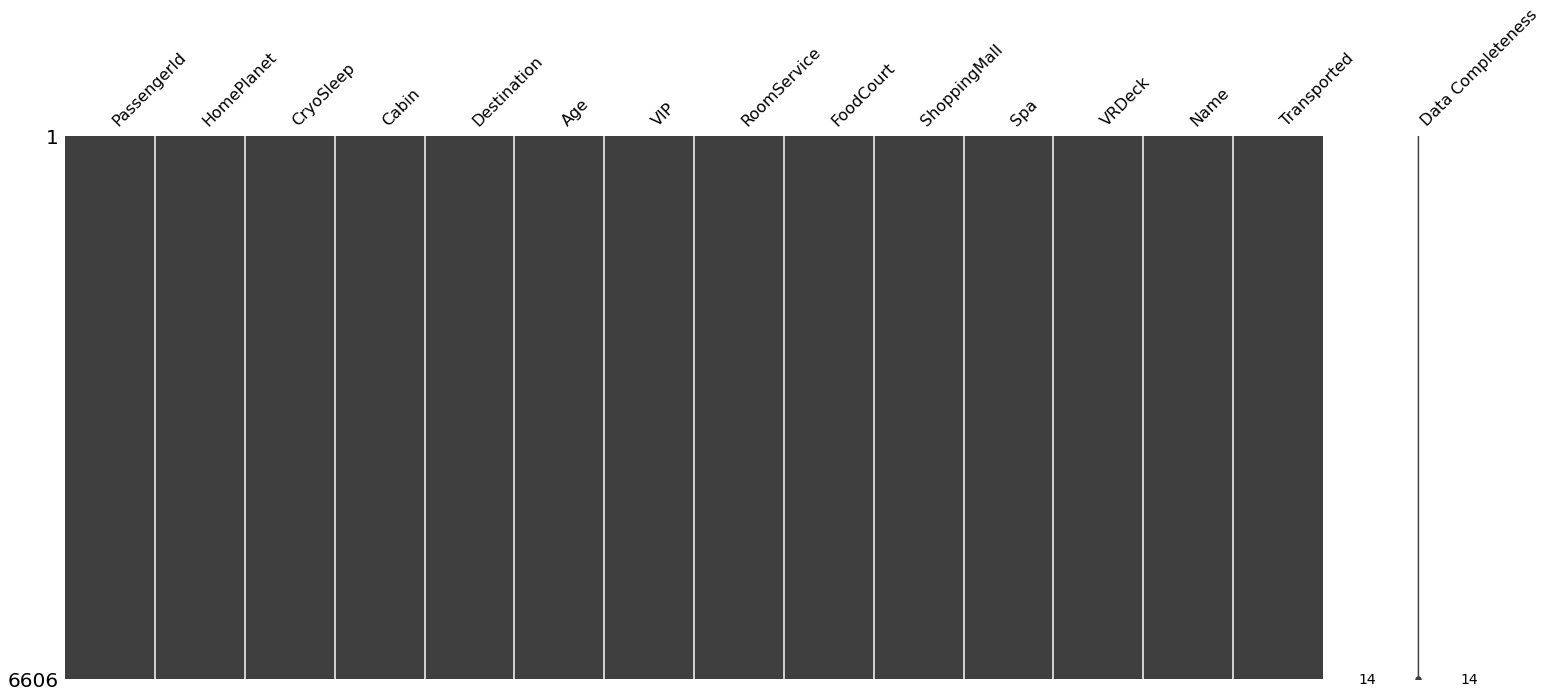

In [12]:
msno.matrix(train,labels = True)

## Feature Engineering
* Let's cover our losses of the data that we lost to null values.
* Here we try to do a bit of feature engineering and add some new variable in our dataset from the ones we are provided.
* **PassengerId** is having ggg_pp string, ggg means grp_no and pp means no of ppl in a grp, we will divide them and add them in the dataset.
* **Cabin** is having deck/num/side string, we can divide deck , num , side separately and add into our dataset.
* Transported feature is our target variable that we are going to predict, if transported value is True or 1 means that the person is transported successfully to the other dimension elsewise False or 0.
* We created a new feature **Survived** having values of 0's and 1's , 1 being a person alive and safely transported and 0 being a person is dead.

In [13]:
train[['GrpNo','PplInGrp']] = train.PassengerId.str.split('_',expand = True)
train[['Deck','Num','Side']] = train.Cabin.str.split('/',expand = True)

In [14]:
train['Transported'] = np.where(train['Transported'] == True , 1, 0)
train['Survived'] = np.where(train['Transported'] == True , 1, 0)
train['VIP'] = np.where(train['VIP'] == True , 1, 0)
train['CryoSleep'] = np.where(train['CryoSleep'] == True , 1, 0)

## Explanatory Data Analysis
* Lets try and find what information can we extract from different visuals.

### Heatmap correlation tells us how different variables are correlated with each other.

<AxesSubplot:>

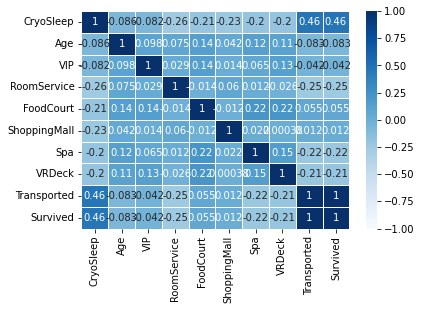

In [15]:
sns.heatmap(train.corr(),annot=True,center=0,vmin = -1 , vmax = 1 , linewidths = 1 , cmap = 'Blues')

### Jointplot tells us the relationship between two variables and their individual distribution.

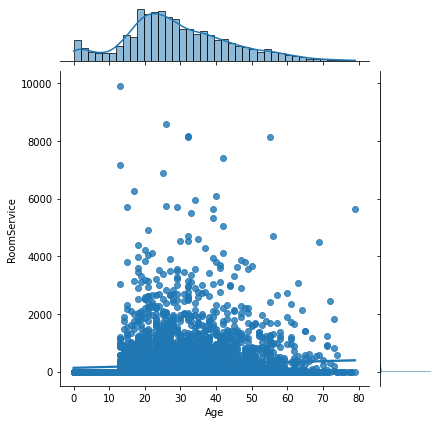

In [16]:
sns.jointplot('Age','RoomService',data=train , kind = 'reg')
# there is strong relationship btw these two variables

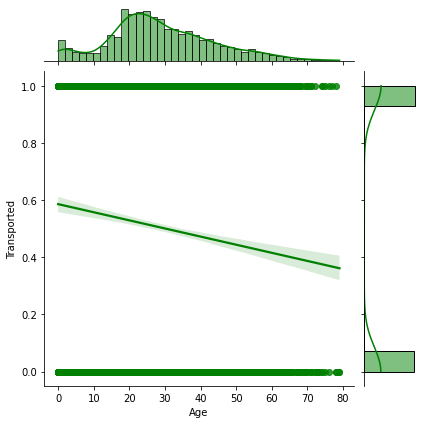

In [17]:
sns.jointplot('Age','Transported',data=train , kind = 'reg' , color = 'green')
# there is a reverse relationship btw age and transported variable as the correlation is -0.083

### Catplot tells the relationship between the categorical variables.

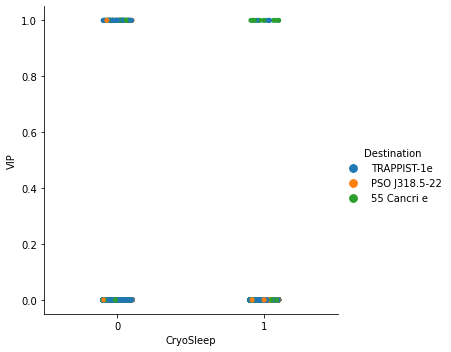

In [18]:
sns.catplot('CryoSleep','VIP',data = train , hue = 'Destination' , )

## Applying Linear Model


In [19]:
col = train.select_dtypes(include=np.number) # the dataframe of columns related to numbered data
col.columns # returns all the columns name

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Survived'],
      dtype='object')

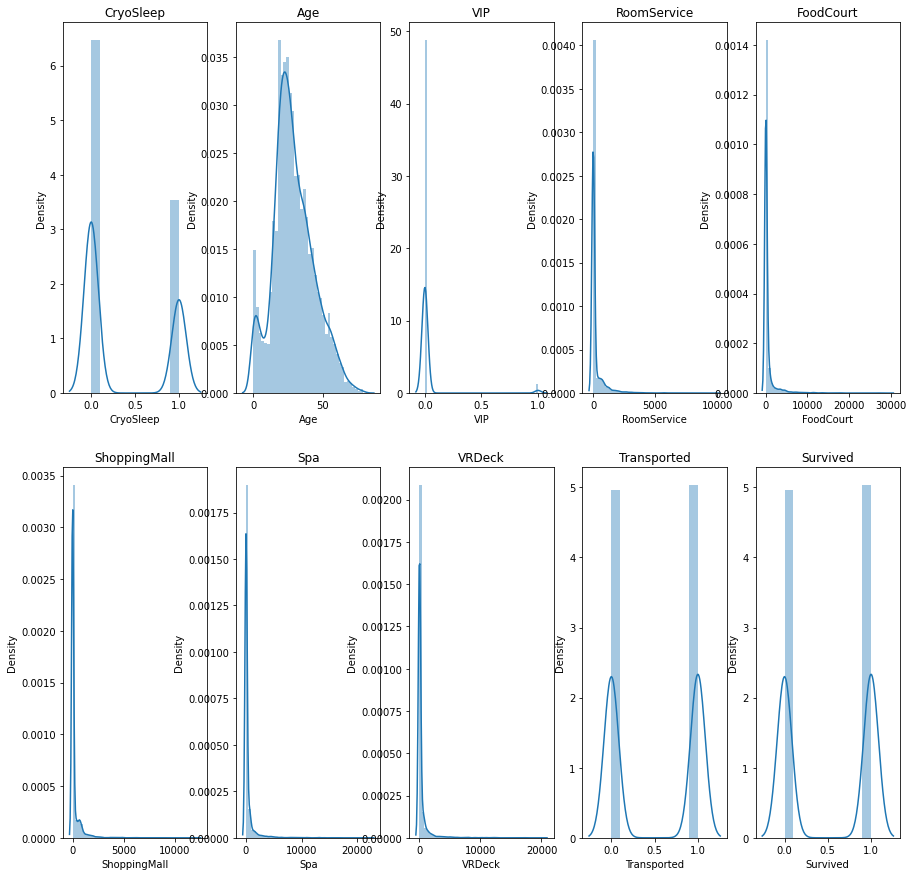

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 5)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, col):
    sns.distplot(train[col], ax = ax)
    ax.set_title(col)